# **1. 🧠 Concept Overview**

#### **Multiple Linear Regression Equation**

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon
$$

Where:  

- $Y$ → Dependent variable (target)  
- $X_1, X_2, \dots, X_n$ → Independent variables (features)  
- $\beta_0$ → Intercept (constant term)  
- $\beta_1, \dots, \beta_n$ → Coefficients (how much $Y$ changes with $X_i$)  
- $\epsilon$ → Error term (residuals) 

# **2. ⚠️ Why Plotting Multiple Linear Regression Is Non-Trivial (Not - straight forward)**

In **Simple Linear Regression**, you have one feature → you can easily draw a straight line on a 2D plot.

In **Multiple Linear Regression**, there are **2 or more features**, meaning the relationship lies in **higher dimensions**.

For example:

- If you have **2 features (X₁, X₂)** → The regression surface is a **plane in 3D space.**

- If you have **3 or more features** → The regression surface exists in **4D or higher**, which cannot be visualized directly.

➡️ So, **for 2D plots**, we usually:

- **Fix all other variables** to their **mean** (or a constant),

- And then show how **Y changes with one variable** at a time.

# **3. 🎨 Two Visualization Approaches**


| Type                             | Description                                                    | Example                                          |
| -------------------------------- | -------------------------------------------------------------- | ------------------------------------------------ |
| **2D Plot (Partial Dependence)** | Plot predicted ( Y ) vs one feature while keeping others fixed | Useful to understand feature impact individually |
| **3D Surface Plot**              | Visualize how two features together affect ( Y )               | Best when you have only two predictors           |


# **4. 🧩 Step-by-Step Implementation**

Let’s take an example with two features:

$𝑋_1 = Hours Studied$,  $𝑋_2 = Sleep Hours$, and ​$𝑌 = Exam Score$

## **🧮 Step 1: Import Required Library and create the dataset**

In [375]:
import numpy as np 
import pandas as pd


In [376]:
x1 = np.random.uniform(1, 10, 500) # Hours studied
x2 = np.random.uniform(5, 9, 500) # sleep hours

y = 5 + 2*x1 + 3*x2 + np.random.normal(0, 2, 500) # Exam score

# Combine into DataFrame

data = pd.DataFrame({'Hours_Studied': x1, 'Sleep_Hours': x2, 'Exam_Score': y})

# Purpose of np.random.normal(0, 2, 500):
# It generates random floating-point numbers (the error term) based on the Normal (Gaussian) distribution  
# — the famous bell curve.  
# This makes the data more realistic, as real-world data never perfectly fits a linear equation.

In [377]:
data.head(10)

,Hours_Studied,Sleep_Hours,Exam_Score
0,9.963984,6.620824,45.640843
1,3.505695,6.425920,31.809619
2,7.156140,5.440904,33.976255
3,2.957585,8.471601,32.804453
4,1.246067,5.969986,25.687148
5,1.461223,7.125899,32.582797
6,9.278084,7.722795,45.151120
7,4.779730,5.475395,32.798254
8,6.559405,7.963889,44.226937
9,1.775155,5.081954,17.978324


## 🌟🌟🌟 **NOTE FOR THE ABOVE CODE**

### `.uniform(low, high, size)`

This is a method of the **`np.random`** module.

**Purpose:**  
It generates random floating-point numbers (decimals) that are *uniformly distributed* within a specified interval.  
“Uniformly distributed” means every number in the interval has an equal probability of being selected.

---

**Arguments:**

- **`low`** (e.g., `1` for $x_1$, `5` for $x_2$):  
  The lower bound of the output range (**inclusive**).

- **`high`** (e.g., `10` for $x_1$, `9` for $x_2$):  
  The upper bound of the output range (**exclusive**, but often close enough to consider inclusive in practice).

- **`size`** (`500`):  
  The number of random samples (data points) to generate, which creates a NumPy array of length `500`.

---

**Result:**

- **`x1`** becomes a NumPy array of 500 random values for *“Hours studied”* between **1 and 10**.  
- **`x2`** becomes a NumPy array of 500 random values for *“Sleep hours”* between **5 and 9**.


## 🌟🌟🌟

### `y = 5 + 2*x1 + 3*x2 + np.random.normal(0, 2, 500)`  # Exam score

This line calculates the **Exam Score** ($y$) based on a linear model:  

$$
y = \text{Intercept} + (\text{Coefficient}_1 \times x_1) + (\text{Coefficient}_2 \times x_2) + \text{Error}
$$

---

### 🔹 Linear Model Components:

- **`5`** → The **intercept** or baseline score.  
- **`2*x1`** → The contribution of *Hours Studied* ($x_1$), where **2** is the coefficient  
  (i.e., each extra hour studied adds **2 points** to the score).  
- **`3*x2`** → The contribution of *Sleep Hours* ($x_2$), where **3** is the coefficient  
  (i.e., each extra hour of sleep adds **3 points** to the score).


### 🔹 `np.random.normal(loc, scale, size)`

This is a method used to simulate random **“noise”** or **error** in the data.

**Purpose:**  
It generates random floating-point numbers (the error term) based on the **Normal (Gaussian) distribution**  
— the famous *bell curve*.  
This makes the data more realistic, as real-world data never perfectly fits a linear equation.

---

**Arguments:**

- **`loc` (0):** The mean ($\mu$) of the distribution.  
  A mean of **0** means the errors are centered around zero (some positive, some negative).  

- **`scale` (2):** The standard deviation ($\sigma$) of the distribution,  
  which controls the spread or intensity of the noise.  

- **`size` (500):** The number of error terms to generate.  

---

**Result:**  
The error array is added element-wise to the linear part of the equation,  
generating the final **`y`** array of **500 Exam Scores**.


# 🧠 **Step 2: Fit the Multiple Linear Regression Model**

In [378]:
x = data.iloc[:,:-1]
y = data["Exam_Score"]


In [379]:
from sklearn.model_selection import train_test_split

In [380]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 21)

In [381]:
x_train.ndim, y_train.ndim

(2, 1)

In [382]:
from sklearn.linear_model import LinearRegression

In [383]:
lr = LinearRegression()

In [384]:
lr.fit(x_train,y_train)

LinearRegression()

In [385]:
lr.score(x_test, y_test)

0.937144040088263

In [386]:
print("Intercept: ", lr.intercept_)
print("Coefficients: ", lr.coef_)

Intercept:  4.959613948802257
Coefficients:  [2.07547501 2.96024947]


## **🪄 Step 4: Plot 2D Relationships (Feature vs Target)**

To **visualize each feature separately**, we **fix the other feature to its mean** and plot predicted values

In [387]:
x_test.head(3)

,Hours_Studied,Sleep_Hours
149,1.054669,5.413847
468,4.096349,5.720728
294,1.806421,6.057019


In [388]:
sleep_mean = data["Sleep_Hours"].mean()

# x1 is hours studied

# to be predicted
x_toPred = np.column_stack((x1,np.full(500, sleep_mean))) 


# Predicted values
y_pred = lr.predict(x_toPred)


/home/akash/myEnv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 🌟🌟🌟 **NOTE FOR ABOVE CODE `np.column_stack((x1, np.full(100, sleep_mean)))`** 

##### 1. `np.cloumn_stack()`
    - This Numpy function **stacks 1D arrays as columns** into a **2D array (matrix).**

**example**
 ```python
a = [1, 2, 3]
b = [4, 5, 6]
np.column_stack((a, b))
```
**Output**

```lua
array([[1, 4],
       [2, 5],
       [3, 6]])

```
So — `np.column_stack()` merges multiple 1D arrays **side by side** as columns.

##### 2. `np.full(100, sleep_mean)`

**Meaning**
    - This function creates a **Numpy array of a given size (`500` here) and fills it witha constant value(`sleep_mean`)**
  
**Example**
```python
np.full(5, 10)

```

**Output**
```lua
array([10, 10, 10, 10, 10])
```
<br>
<hr>
<br>


### ➡️ Plot Between Exam_Score Vs Hours_Studied

In [389]:
import matplotlib.pyplot as plt

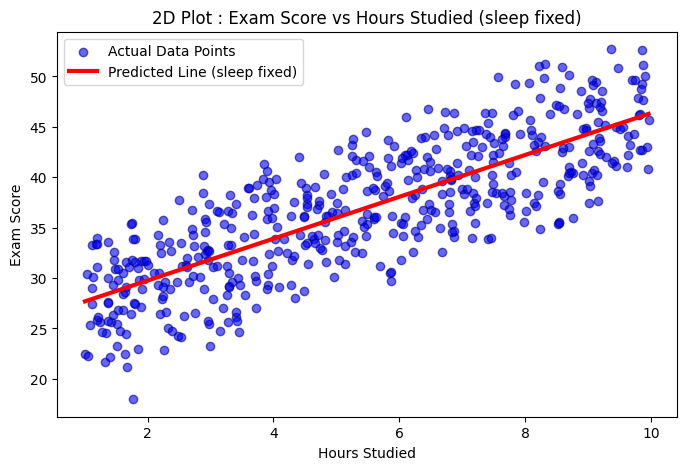

In [390]:
# now plotting the graph

plt.figure(figsize = (8,5))

plt.scatter(x1, 
            y, 
            color = 'blue', 
            alpha = 0.6,
            linewidth = 1,
            edgecolor = 'darkblue',
            label = "Actual Data Points")

plt.plot((x1.min() , x1.max()), (y_pred.min(), y_pred.max()), color = 'red', linewidth = 3 ,label = "Predicted Line (sleep fixed)" )

plt.xlabel("Hours Studied")

plt.ylabel("Exam Score")

plt.title("2D Plot : Exam Score vs Hours Studied (sleep fixed)")

plt.legend()

plt.show()

### ➡️ Exam_Score vs Sleep_Hours 

In [391]:
# fixing the hours_studied to its mean

study_mean = data["Hours_Studied"].mean()

x_toPred = np.column_stack((np.full(500, study_mean), x2))

y_pred = lr.predict(x_toPred)

/home/akash/myEnv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


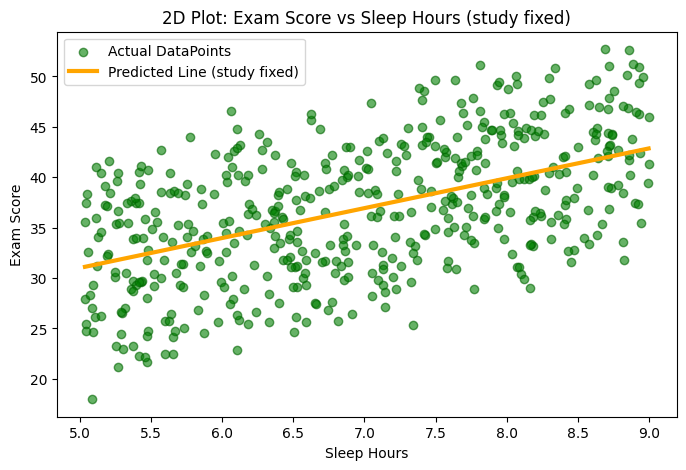

In [392]:
plt.figure(figsize = (8,5))

plt.scatter(x2,
            y,
            color='green',
            label = 'Actual DataPoints',
            alpha = 0.6,
            linewidth = 1,
            edgecolor = 'darkgreen')

plt.plot((x2.min(),x2.max()), (y_pred.min(),y_pred.max()), color = "orange", label = "Predicted Line (study fixed)", linewidth = 3)

plt.xlabel("Sleep Hours")
plt.ylabel("Exam Score")
plt.title("2D Plot: Exam Score vs Sleep Hours (study fixed)")
plt.legend()
plt.show()

### 🌄 **3D Visualization (Regression Plane)**

In [393]:
x_surf, y_surf = np.meshgrid(
    np.linspace(x1.min(), x1.max(), 20),
    np.linspace(x2.min(), x2.max(), 20)
)

#prediction across grid
model_input = np.column_stack((x_surf.ravel(), y_surf.ravel()))

y_pred = lr.predict(model_input).reshape(x_surf.shape)

/home/akash/myEnv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


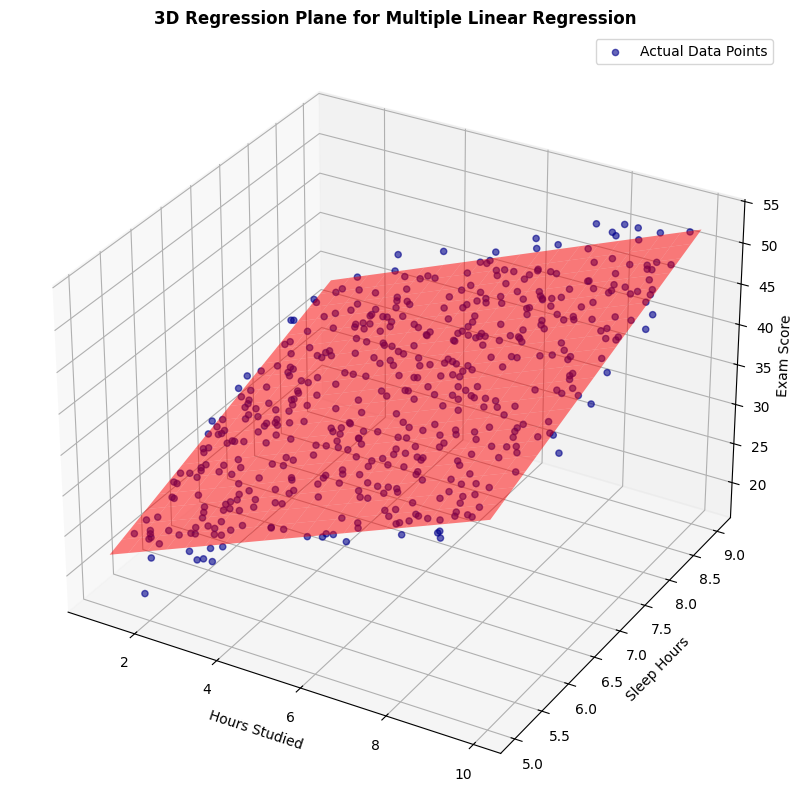

In [ ]:
fig = plt.figure(figsize=(15, 10),)

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, 
           x2, 
           y, 
           color = 'darkblue', 
           label = 'Actual Data Points',
           alpha = 0.6,
        #    s = 20,
           linewidth = 1,
           )

ax.plot_surface(x_surf, y_surf, y_pred, alpha = 0.5, color = 'red')

ax.set_xlabel("Hours Studied")
ax.set_ylabel("Sleep Hours")
ax.set_zlabel("Exam Score", labelpad = 0)
ax.set_title("3D Regression Plane for Multiple Linear Regression", fontweight = 'bold')
# plt.tight_layout(pad = 3.0, w_pad = 2.0)
plt.legend()
plt.show()